In [ ]:
!pip install tensorflow opencv-python-headless

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance



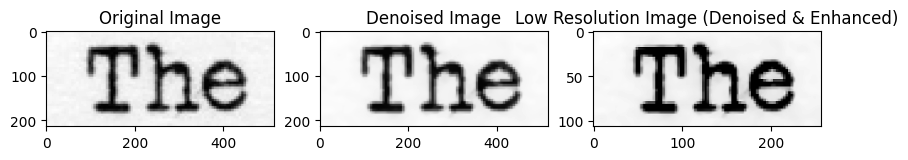

Processed low-resolution image has been saved to: /content/1_re.jpg


In [ ]:
#must put the img and this ipynb into same folder

# Load and display the original image
# 'image_path' is the path to the image file we want to process
image_path = '/content/1.jpg'  # Use the uploaded image path
# Load the image in grayscale using OpenCV
original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply image denoising
# fastNlMeansDenoising is an OpenCV function that performs noise reduction
# 'h' determines the strength of the filtering, and templateWindowSize/searchWindowSize define the window sizes
denoised_img = cv2.fastNlMeansDenoising(original_img, None, h=10, templateWindowSize=7, searchWindowSize=21)

# Enhance contrast of the denoised image
# Convert the image to a PIL Image format for further enhancement
pil_img = Image.fromarray(denoised_img)
# Enhance the contrast of the image using ImageEnhance
# 'enhance(1.5)' increases the contrast by 1.5 times the original
enhancer = ImageEnhance.Contrast(pil_img)
contrasted_img = enhancer.enhance(1.5)

# Downscale the image to simulate a low-resolution image
# Resize the image to half its original size in both dimensions using cubic interpolation
low_res_img = cv2.resize(np.array(contrasted_img), (contrasted_img.size[0]//2, contrasted_img.size[1]//2), interpolation=cv2.INTER_CUBIC)

# Plot the original, denoised, and low-resolution images for comparison
plt.figure(figsize=(10,5))

# Display the original image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(original_img, cmap='gray')

# Display the denoised image
plt.subplot(1, 3, 2)
plt.title('Denoised Image')
plt.imshow(denoised_img, cmap='gray')

# Display the low-resolution image (after denoising and contrast enhancement)
plt.subplot(1, 3, 3)
plt.title('Low Resolution Image (Denoised & Enhanced)')
plt.imshow(low_res_img, cmap='gray')

# Show the comparison of the images in a single figure
plt.show()

# Save the low-resolution processed image to a new file
# 'output_path' specifies the path where the processed image will be saved
output_path = '/content/1_re.jpg'
cv2.imwrite(output_path, low_res_img)
# Confirm the save action with a message
print(f"Processed low-resolution image has been saved to: {output_path}")
